# PROBLEM DEFINITION


FicZon Inc is an IT solution provider with products ranging from on-
premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.

FicZon business is majorly dependent on the sales force
effectiveness. As the market is maturing and more new competitors
entering the market, FicZon is experiencing the dip in sales.

Effective sales is dependent on lead quality and as of now, this is
based on manual categorization and highly depended on sales staff.
Though there is a quality process, which continuously updates the
lead categorization, it’s value is in for post analysis, rather than
conversation.

# BUSINESS CASE 

FicZon wants to explore Machine Learning to pre-categorize the lead
quality and as result, expecting significant increase in sales
effectiveness.

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql

# Importing data from SQL database

In [2]:
HOST = '***.***.***.***'
USER = '*****'
PASSWORD = '**********'
DATABASE = '********'

In [3]:
try:
    # Establishing a connection and creating a cursor
    with pymysql.connect(host=HOST, user=USER, passwd=PASSWORD, db=DATABASE) as conn:
        with conn.cursor() as cur:
            # Executing SQL queries
            cur.execute(f'USE {DATABASE}')
            
            sql = """SELECT *
                     FROM data"""
            cur.execute(sql)
            conn.commit()

            # Fetching results
            results = cur.fetchall()

            # Converting results to a pandas DataFrame
            columns = [desc[0] for desc in cur.description]
            data = pd.DataFrame(results, columns=columns)

except pymysql.Error as e:
    print(f"Error: {e}")

In [4]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


# Basic Checks

In [5]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [6]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [7]:
data.shape

(7422, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [9]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [10]:
#check any NaN values
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [11]:
#unique value

In [12]:
data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [13]:
data['Sales_Agent'].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [14]:
data['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [15]:
data['Delivery_Mode'].value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

# EDA

In [16]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [17]:
#Droping of Unwanted Features

In [18]:
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True) 

In [19]:
data.head(1)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open


In [20]:
#Deleting the empty fields from data

In [21]:
data.drop(data[data['Product_ID']==''].index,inplace=True)
data.drop(data[data['Location']==''].index,inplace=True)
data.drop(data[data['Source']==''].index,inplace=True)
data.drop(data[data['Delivery_Mode']==''].index,inplace=True)
data.drop(data[data['Sales_Agent']==''].index,inplace=True)
data.drop(data[data['Status']==''].index,inplace=True)

In [22]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [23]:
# rearrage the column to standardized the data

In [24]:
data=data.reindex(columns=['Product_ID','Location','Source','Delivery_Mode','Sales_Agent','Status'])

In [25]:
data

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Status
18,9,Bangalore,Live Chat-Google Organic,Mode-1,Sales-Agent-3,Potential
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,Potential
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,Potential
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,Not Responding
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,In Progress Positive
...,...,...,...,...,...,...
7417,9,Mumbai,Call,Mode-4,Sales-Agent-6,LOST
7418,15,Other Locations,Call,Mode-5,Sales-Agent-12,LOST
7419,5,Bangalore,Live Chat-Direct,Mode-1,Sales-Agent-11,Not Responding
7420,21,Other Locations,CRM form,Mode-1,Sales-Agent-4,Just Enquiry


In [26]:
data['Product_ID'].value_counts()

18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
8        6
17       6
13       4
16       3
24       2
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [27]:
data['Product_ID']=data['Product_ID'].astype('int64') 

# Encoding Categorical Features

In [28]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.Source=enc.fit_transform(data.Source)
data.Sales_Agent=enc.fit_transform(data.Sales_Agent)
data.Location=enc.fit_transform(data.Location)
data.Delivery_Mode=enc.fit_transform(data.Delivery_Mode)

In [29]:
data.Status.value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [30]:
#convert Status into binary classification
#Low Potential Status will be classified as 0
#High Potential Status Will be clasified as 1

In [31]:
#Low Potential Status
data.loc[data['Status'] == 'Junk Lead', 'Status'] = 0
data.loc[data['Status'] == 'Not Responding', 'Status'] = 0
data.loc[data['Status'] == 'In Progress Negative', 'Status'] = 0
data.loc[data['Status'] == 'LOST', 'Status'] = 0

In [32]:
#High Potential Status 
data.loc[data['Status'] == 'CONVERTED', 'Status'] = 1
data.loc[data['Status'] == 'Just Enquiry', 'Status'] = 1
data.loc[data['Status'] == 'Potential', 'Status'] = 1
data.loc[data['Status'] == 'Long Term', 'Status'] = 1
data.loc[data['Status'] == 'In Progress Positive', 'Status'] = 1
data.loc[data['Status'] == 'Open', 'Status'] = 1
data.loc[data['Status'] == 'converted', 'Status'] = 1

In [33]:
data.Status=data['Status'].astype('int64')

In [34]:
data

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Status
18,9,1,16,0,4,1
19,19,10,2,4,5,1
24,18,13,24,0,1,1
25,15,6,24,0,8,0
26,18,1,2,0,8,1
...,...,...,...,...,...,...
7417,9,9,2,3,7,0
7418,15,10,2,4,2,0
7419,5,1,14,0,1,0
7420,21,10,1,0,5,1


In [35]:
data.Status.value_counts()

0    3715
1    3613
Name: Status, dtype: int64

# Multivariate Analysis

In [36]:
from collections import Counter            
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

## Box Plot

<AxesSubplot:>

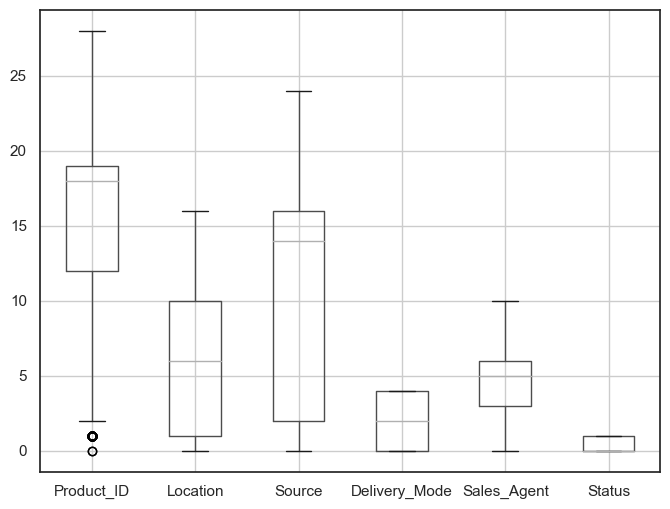

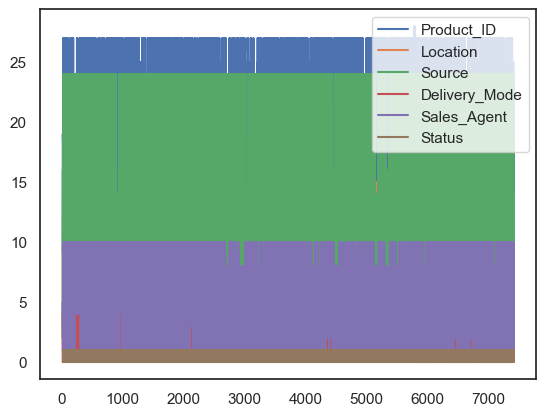

In [37]:
sns.set(style="white")
data.boxplot(figsize=(8,6))
data.plot()

## Histogram plot

<AxesSubplot:>

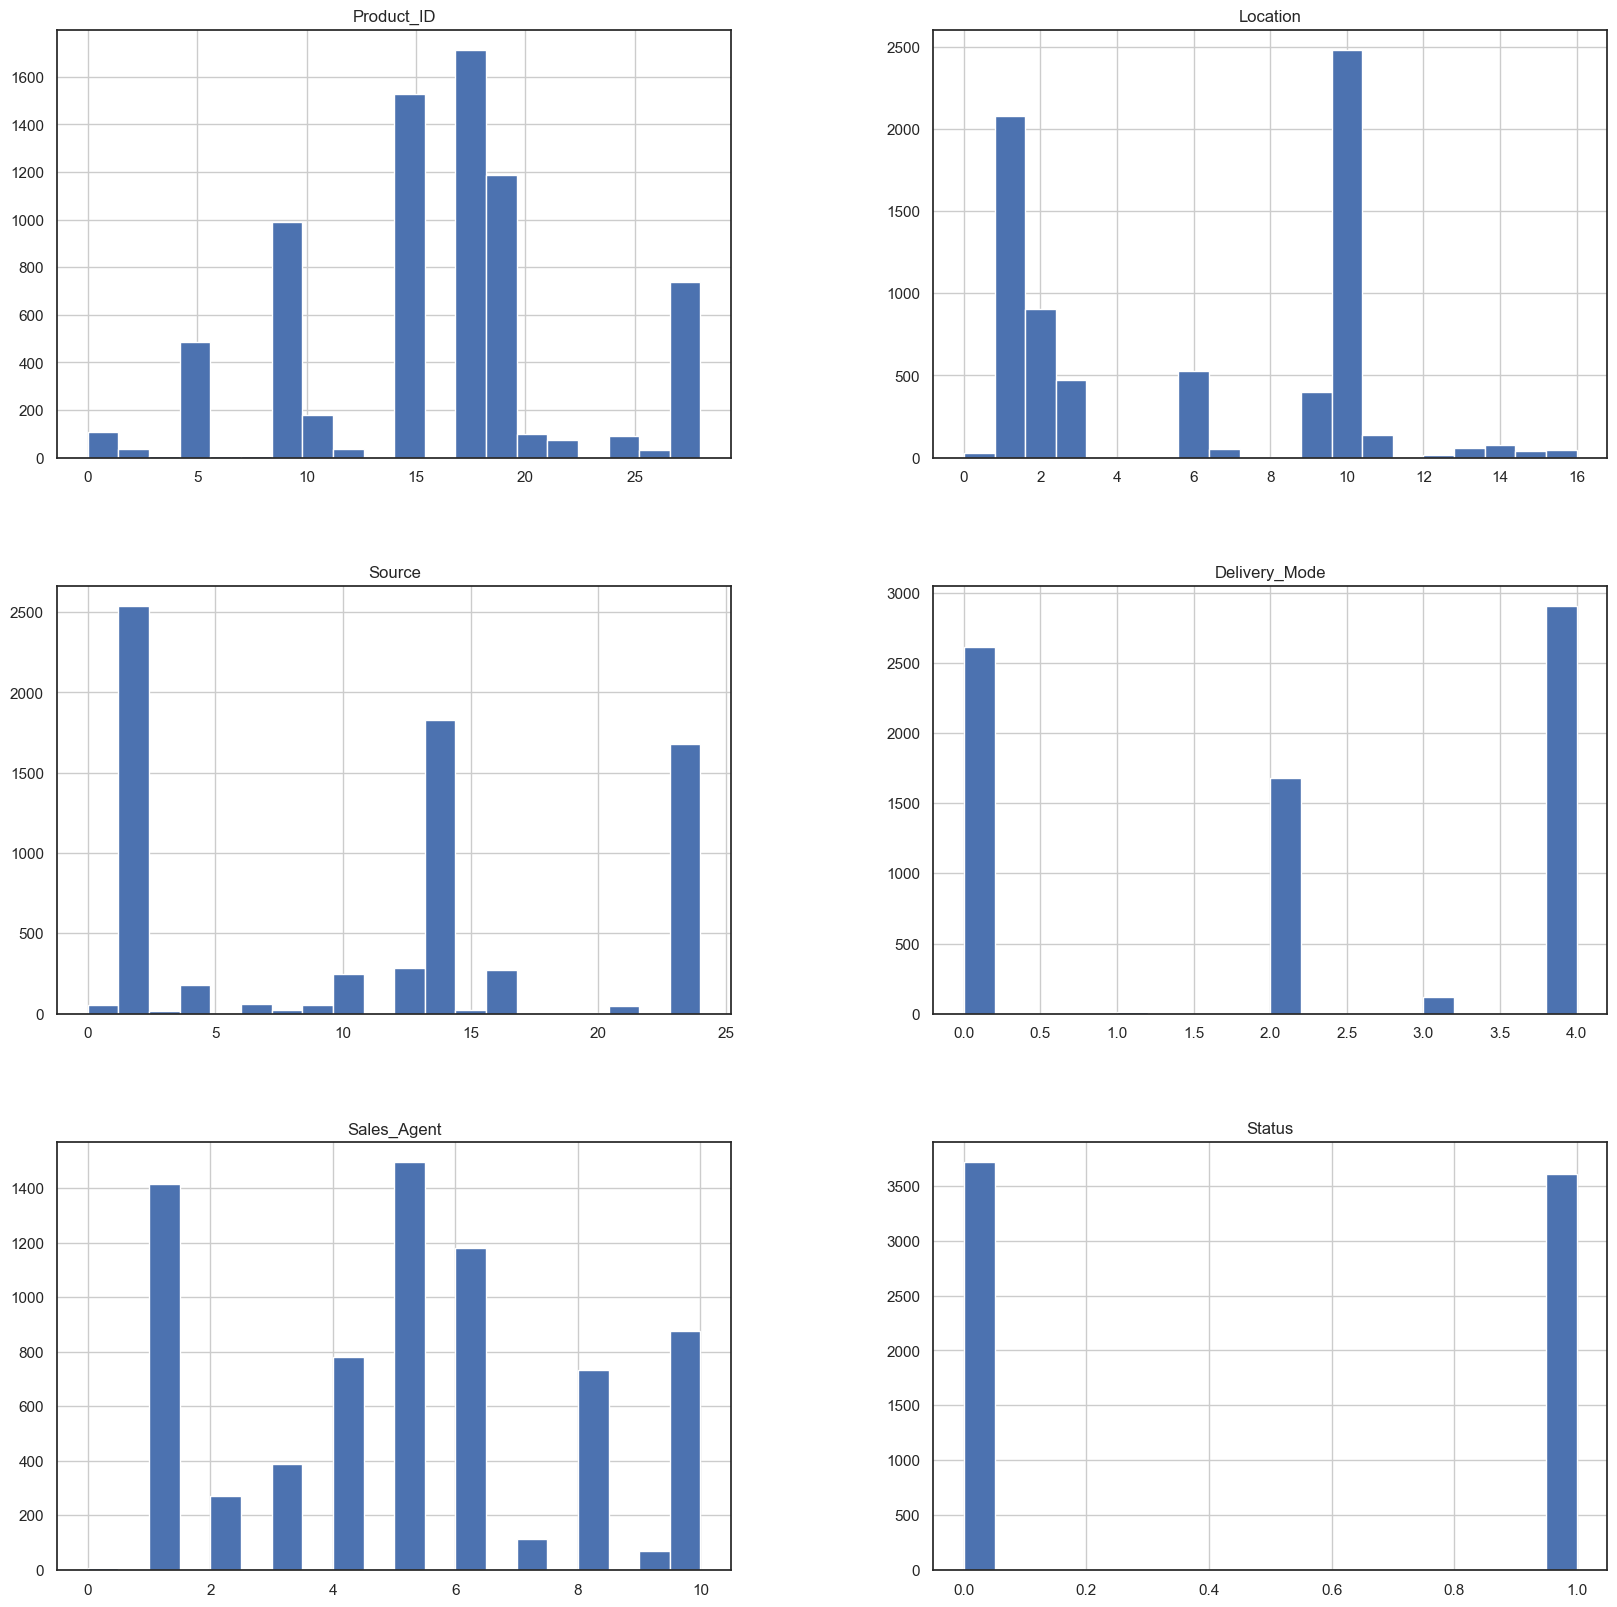

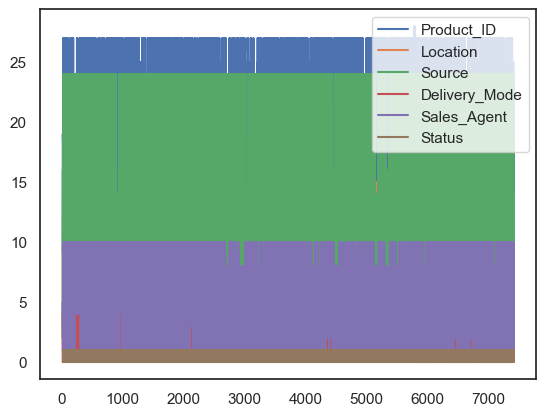

In [38]:
data.hist(bins=20,figsize=(20,20))
data.plot()

## Bar-plot

<AxesSubplot:>

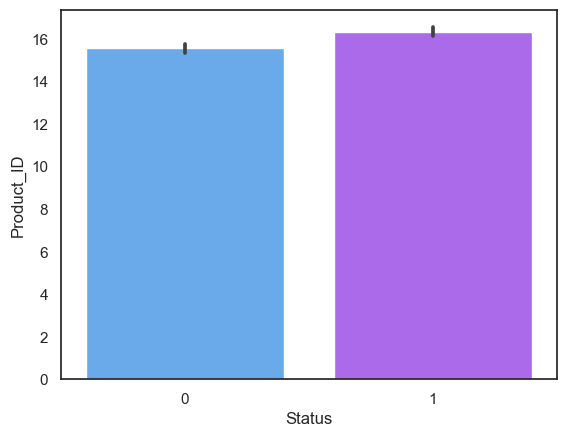

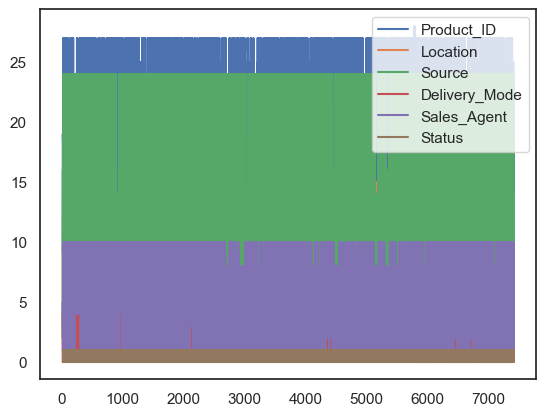

In [39]:
sb.barplot(x=data['Status'],y=data['Product_ID'], palette = 'cool')
data.plot()

### Subplots-barplot

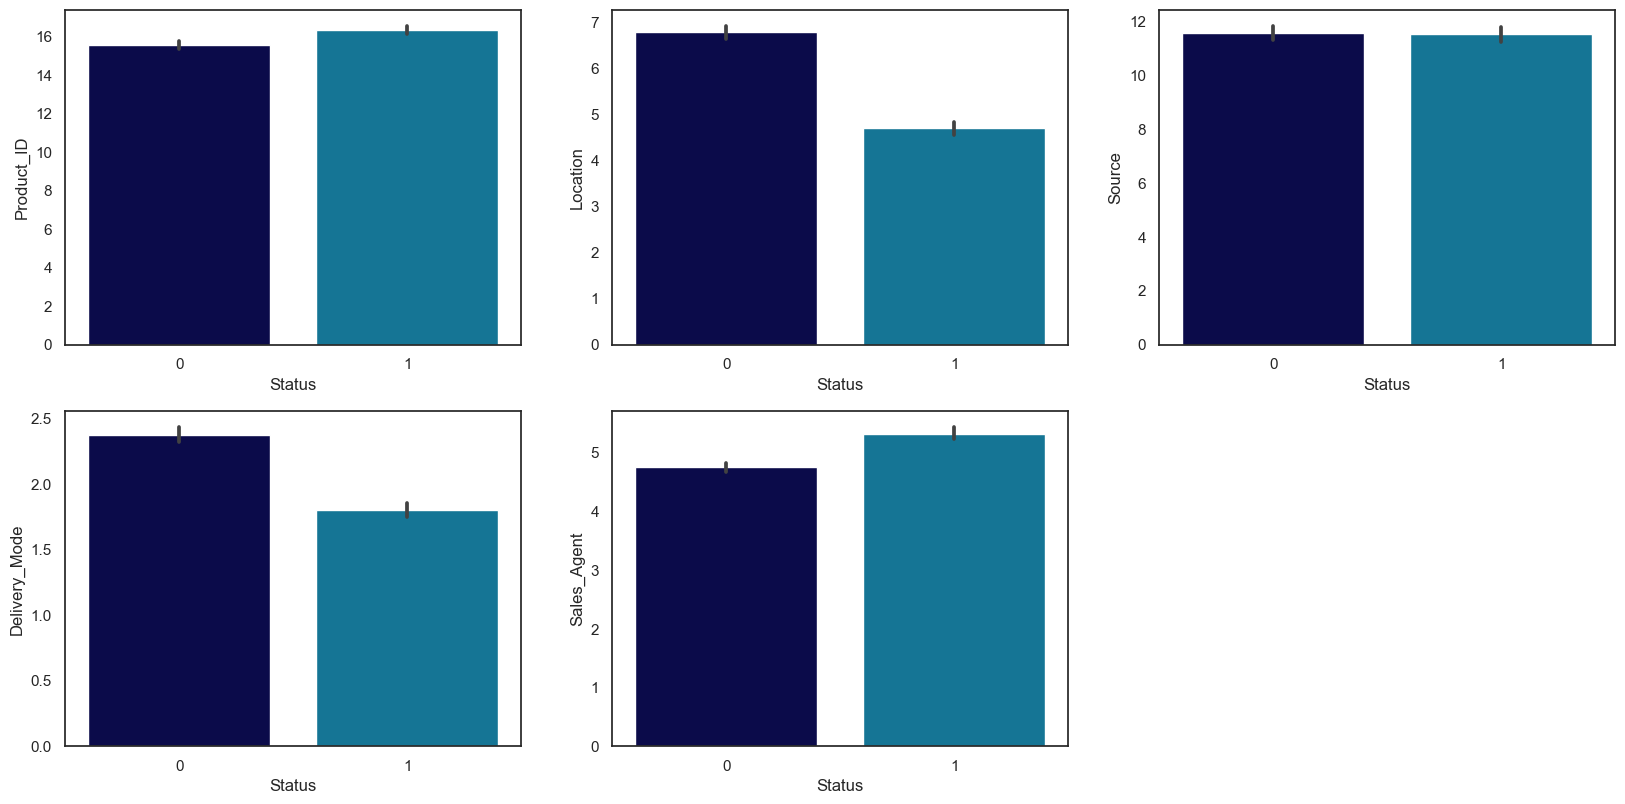

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sb.barplot(x=data['Status'],y=data['Product_ID'], palette ='ocean')
plt.subplot(4,3,2)
sb.barplot(x=data['Status'],y=data['Location'],palette ='ocean')
plt.subplot(4,3,3)
sb.barplot(x=data['Status'],y=data['Source'], palette ='ocean')
plt.subplot(4,3,4)
sb.barplot(x=data['Status'],y=data['Delivery_Mode'], palette ='ocean')
plt.subplot(4,3,5)
sb.barplot(x=data['Status'],y=data['Sales_Agent'], palette ='ocean')

plt.show()

## countplot

<AxesSubplot:>

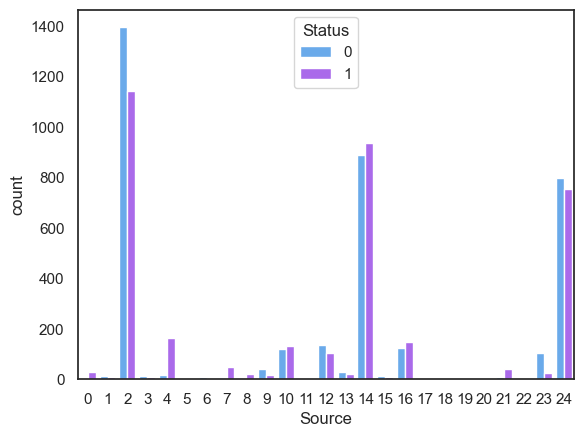

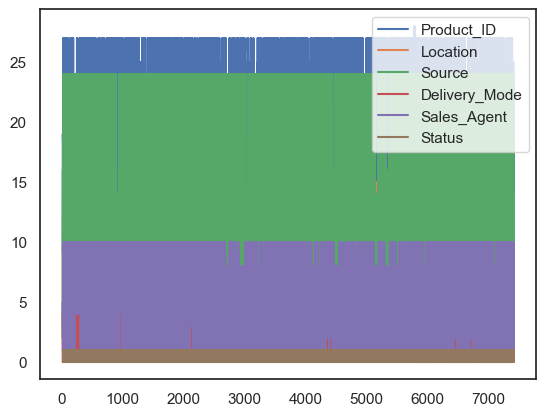

In [41]:
sb.countplot(x='Source',hue='Status',data=data, palette = "cool")
data.plot()

### subplots-countplot

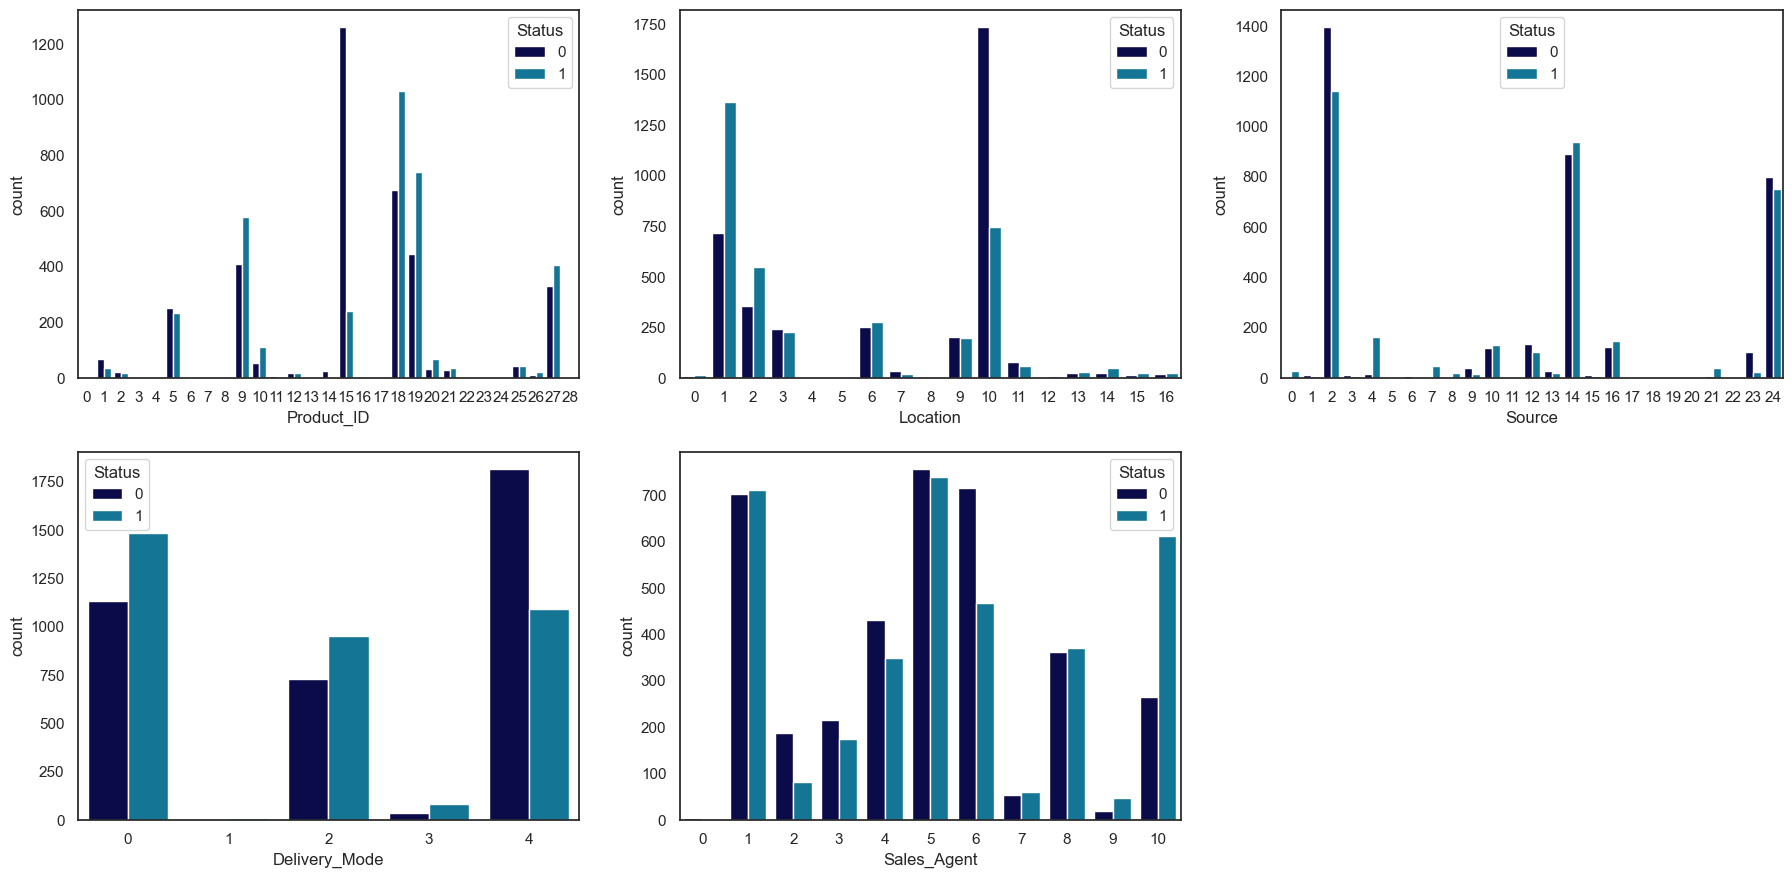

In [42]:
plt.figure(figsize=(22,22))
plt.subplot(4,3,1)
sb.countplot(x='Product_ID',hue='Status',data=data, palette ='ocean')
plt.subplot(4,3,2)
sb.countplot(x='Location',hue='Status',data=data, palette ='ocean')
plt.subplot(4,3,3)
sb.countplot(x='Source',hue='Status',data=data, palette ='ocean')
plt.subplot(4,3,4)
sb.countplot(x='Delivery_Mode',hue='Status',data=data, palette ='ocean')
plt.subplot(4,3,5)
sb.countplot(x='Sales_Agent',hue='Status',data=data, palette ='ocean')

plt.show()

## Boxplot response with subplot

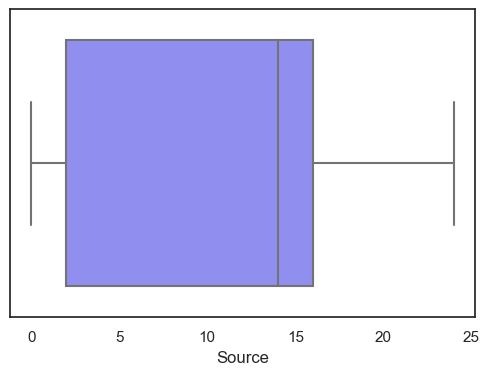

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Source', palette ='cool')
plt.show()

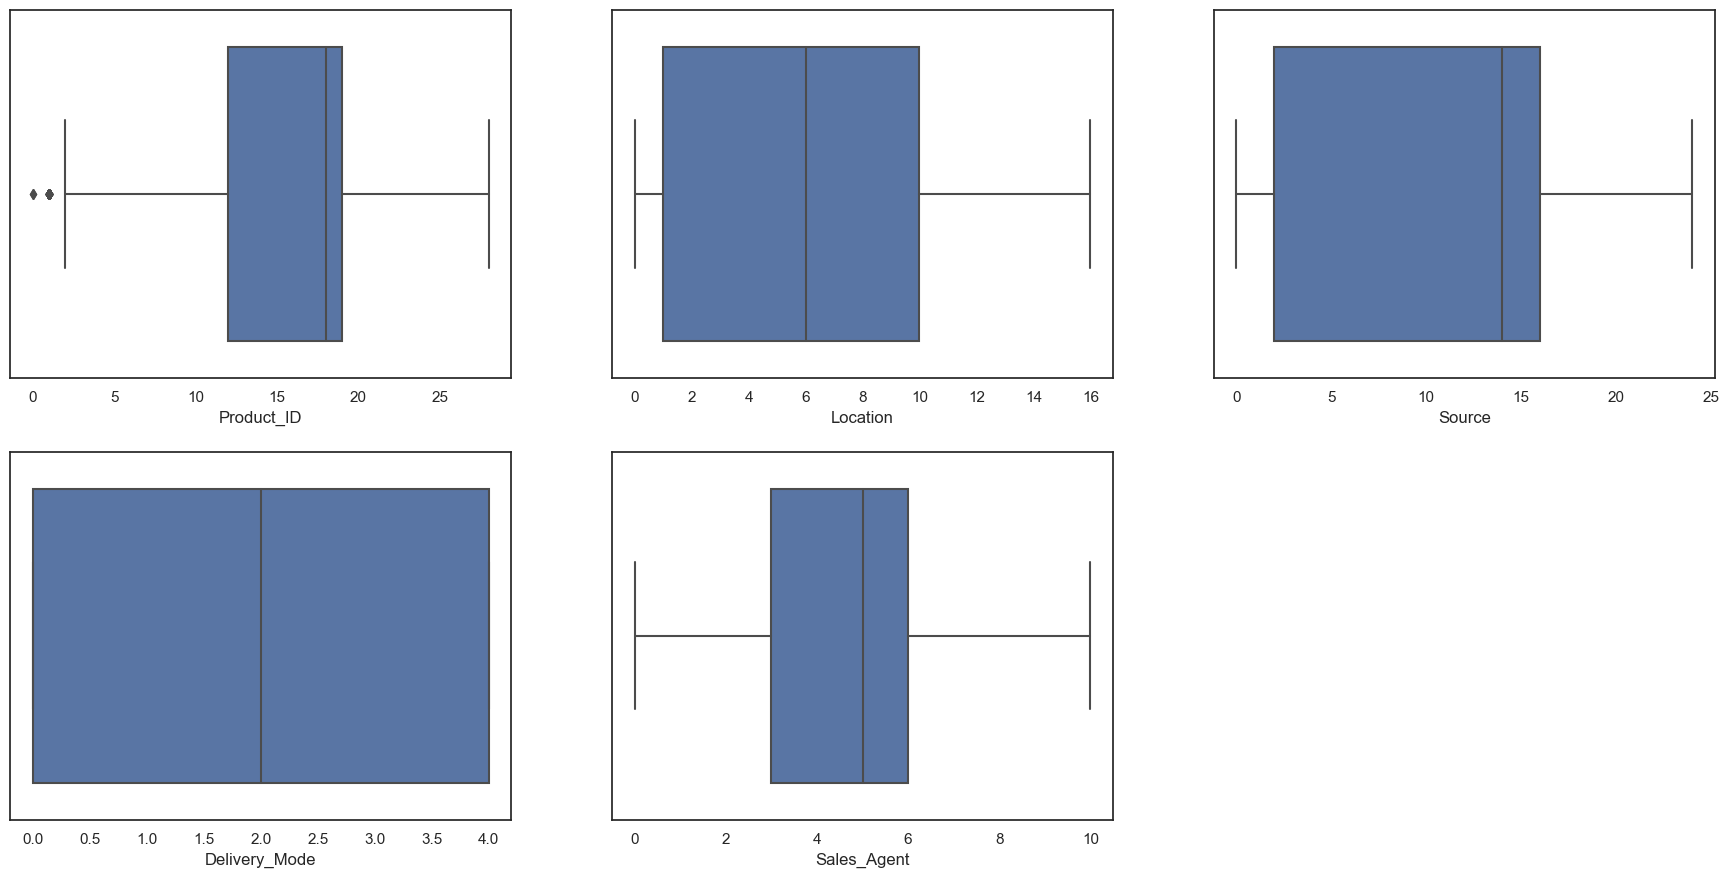

In [44]:
plt.figure(figsize=(22,22))

plt.subplot(4,3,1)
sns.boxplot(data=data, x='Product_ID')
plt.subplot(4, 3, 2)
sns.boxplot(data=data, x='Location')
plt.subplot(4, 3, 3)
sns.boxplot(data=data, x='Source')
plt.subplot(4, 3, 4)
sns.boxplot(data=data, x='Delivery_Mode')
plt.subplot(4, 3, 5)
sns.boxplot(data=data, x='Sales_Agent')
plt.show()


# Model Creation

1. Logistic Regression
2. KNN (K-Nearest Neighbour)
3. Decision Tree
4. Random Forest
5. SVM (support vector machine)
6. NN (Neural networks)
7. XGBoost (Extreme Gradient Boosting)
8. AdaBoosting (Adaptive Boosting)
9. Naive bayes

In [45]:
#We need to assess the performance metrics, including accuracy, precision, recall, and specificity, based on the information provided by the confusion matrix.

In [46]:
def performance(cm):
    a,b,c,d=cm.ravel()           #2 classifier....2x2=4
    accuracy=(a+d)/cm.sum()      
    precision=d/(d+b)            #PPV , 1-FDR                             fdr-false discovery r
    recall=d/(d+c)               #sensitivity, TPR , hit rate, 1-FNR      fnr-miss rate
    specificity=a/(a+b)          #selectivity, TNR ,1-FPR                 fpr-fall out
    F1_score=(2*precision*recall)/(precision+recall)       # HM of precision and recall
    print('Accuracy=',accuracy)
    print('Precision=',precision)
    print('Recall=',recall)
    print('Specificity=',specificity)
    print('F1-Score=',F1_score)

In [47]:
#create a separate function to visualize the confusion matrix

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def visualize_confusion_matrix(cm):
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# 1. Logistic Regression

In [49]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [50]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Status
18,9,1,16,0,4,1
19,19,10,2,4,5,1
24,18,13,24,0,1,1
25,15,6,24,0,8,0
26,18,1,2,0,8,1


In [51]:
x=data.iloc[:,:-1]
y=data.Status

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [53]:
y.head()

18    1
19    1
24    1
25    0
26    1
Name: Status, dtype: int64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [55]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred=model.predict(x_test)

In [57]:
confusion_matrix(y_test,y_pred)

array([[503, 256],
       [260, 447]], dtype=int64)

In [58]:
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.6480218281036835
Precision= 0.635846372688478
Recall= 0.6322489391796322
Specificity= 0.6627140974967062
F1-Score= 0.6340425531914894


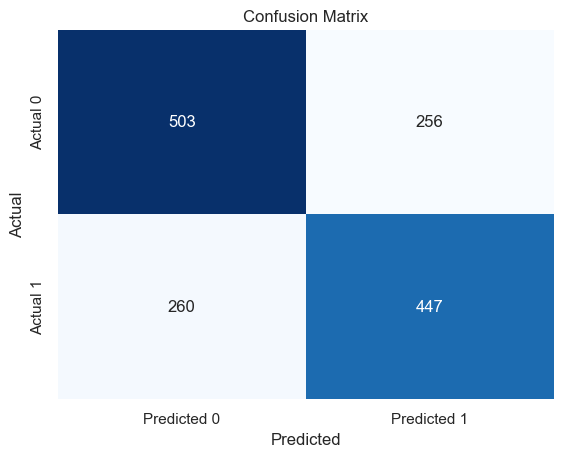

In [59]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 2. KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import scale

In [61]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Status
18,9,1,16,0,4,1
19,19,10,2,4,5,1
24,18,13,24,0,1,1
25,15,6,24,0,8,0
26,18,1,2,0,8,1


In [62]:
x=data.iloc[:,[1,2,3,4]]
y=data.Status

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [64]:
model=KNeighborsClassifier(n_neighbors=1,metric='euclidean')

In [65]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [66]:
y_pred=model.predict(x_test)

C:\Users\Kishan Chaudhari\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
cm=confusion_matrix(y_test,y_pred)

In [68]:
performance(cm)

Accuracy= 0.6161891768985903
Precision= 0.5983606557377049
Recall= 0.619811320754717
Specificity= 0.6128182616330115
F1-Score= 0.6088971269694162


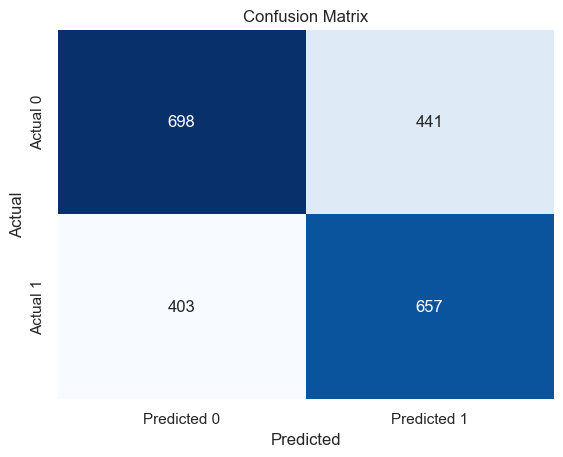

In [69]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 3. Decision Tree

In [70]:
#pip install –upgrade scikit-learn

In [71]:
#pip install pydotplus

In [72]:
import pydotplus

In [73]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from six import StringIO

In [74]:
data.head(3)

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Status
18,9,1,16,0,4,1
19,19,10,2,4,5,1
24,18,13,24,0,1,1


In [75]:
model=DecisionTreeClassifier( max_depth=4)

In [76]:
#test

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [78]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [79]:
y_pred=model.predict(x_test)

In [80]:
cm=confusion_matrix(y_test,y_pred)

In [81]:
performance(cm)

Accuracy= 0.6343792633015006
Precision= 0.5824493731918997
Recall= 0.8543140028288543
Specificity= 0.4295125164690382
F1-Score= 0.6926605504587154


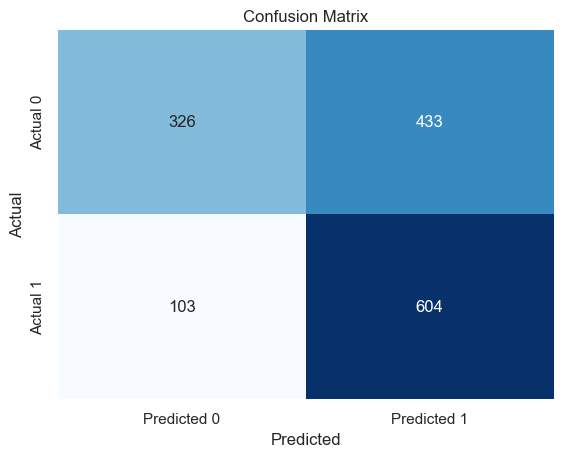

In [82]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 4. Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split#,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [84]:
data.head(3)

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Status
18,9,1,16,0,4,1
19,19,10,2,4,5,1
24,18,13,24,0,1,1


In [85]:
x=data.iloc[:,[1,2,3,4]]
y=data.Status

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [87]:
model=RandomForestClassifier(n_estimators=40,random_state=32)

In [88]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40, random_state=32)

In [89]:
y_pred=model.predict(x_test)

In [90]:
cm=confusion_matrix(y_test,y_pred)

In [91]:
performance(cm)

Accuracy= 0.67462482946794
Precision= 0.6545698924731183
Recall= 0.6888260254596889
Specificity= 0.6613965744400527
F1-Score= 0.6712611991729841


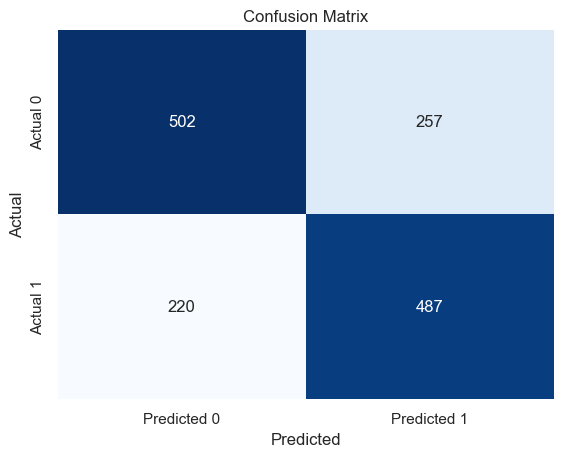

In [92]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 5. SVM

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import scale

In [94]:
x=scale(x)

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [96]:
model=SVC(kernel='rbf',C=10, gamma=0.8)

In [97]:
model.fit(x_train,y_train)

SVC(C=10, gamma=0.8)

In [98]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.6582537517053206
Precision= 0.6317135549872123
Recall= 0.6987270155586988
Specificity= 0.6205533596837944
F1-Score= 0.6635325721961047


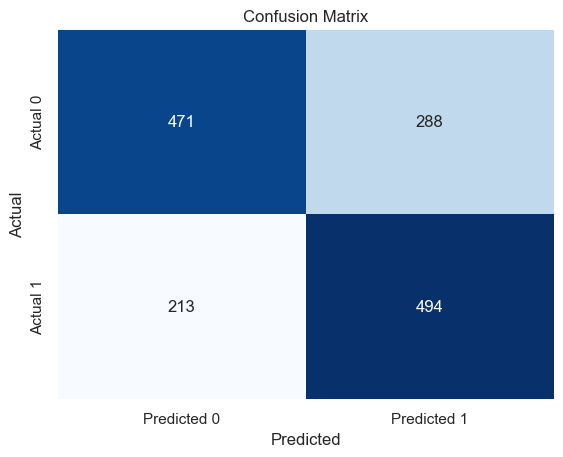

In [99]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 6. Neural Network

In [100]:
from sklearn.neural_network import MLPClassifier

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [102]:
model=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=10,learning_rate_init=0.01,batch_size=50)

In [103]:
model.fit(x_train,y_train)

MLPClassifier(batch_size=50, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, random_state=10)

In [104]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.669849931787176
Precision= 0.641318124207858
Recall= 0.7157001414427157
Specificity= 0.6271409749670619
F1-Score= 0.6764705882352942


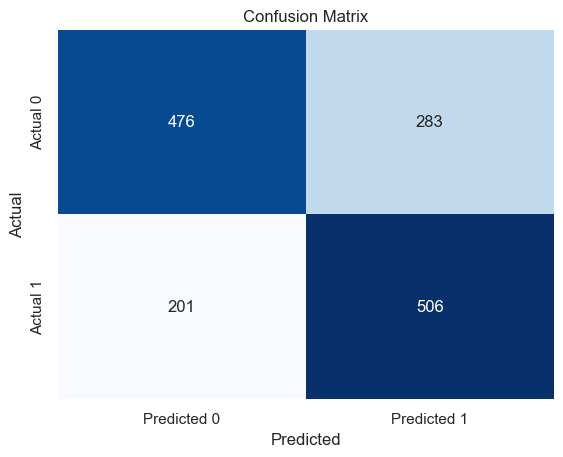

In [105]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 7. XGBoost

In [106]:
from xgboost import XGBClassifier

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [108]:
model=XGBClassifier(learning_rate=0.05,random_state=18,n_estimators=200)

In [109]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=18, ...)

In [110]:
y_pred=model.predict(x_test)

In [111]:
cm=confusion_matrix(y_test,y_pred)

In [112]:
performance(cm)

Accuracy= 0.6814461118690314
Precision= 0.6595744680851063
Recall= 0.7015558698727016
Specificity= 0.6627140974967062
F1-Score= 0.6799177518848526


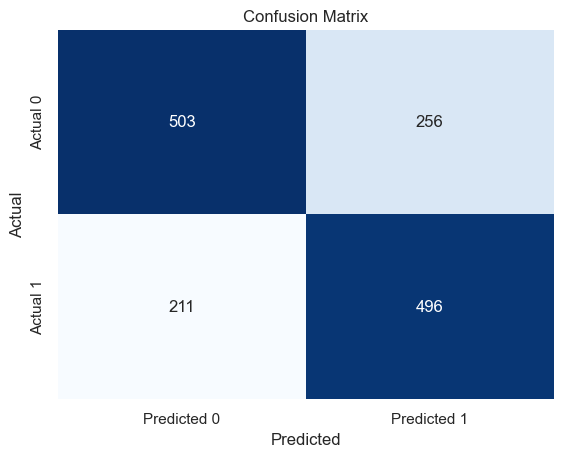

In [113]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 8. AdaBoosting

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [115]:
X = data.iloc[:, [1, 2, 3, 4]]
y = data['Status']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [117]:
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

In [118]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [119]:
y_pred = ada_classifier.predict(X_test)

In [120]:
cm = confusion_matrix(y_test, y_pred)

In [121]:
performance(cm)

Accuracy= 0.6541609822646658
Precision= 0.6278772378516624
Recall= 0.6944837340876945
Specificity= 0.616600790513834
F1-Score= 0.6595030221625252


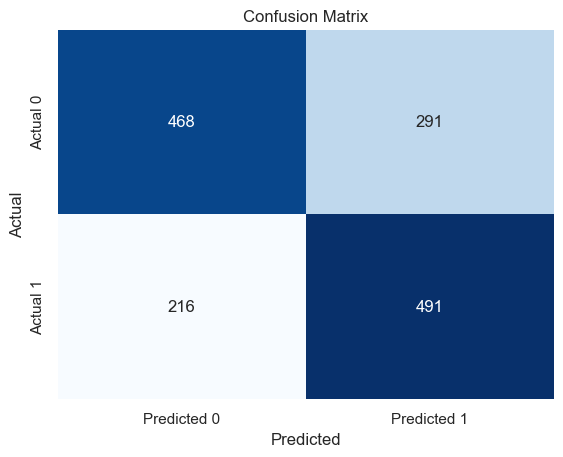

In [122]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# 9. Naive bayes

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [124]:
X = data.iloc[:, [1, 2, 3, 4]]
y = data['Status']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [126]:
naive_bayes_classifier = GaussianNB()

In [127]:
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [128]:
y_pred = naive_bayes_classifier.predict(X_test)

In [129]:
cm = confusion_matrix(y_test, y_pred)

In [130]:
performance(cm)

Accuracy= 0.6425648021828103
Precision= 0.6380090497737556
Recall= 0.5983026874115983
Specificity= 0.6837944664031621
F1-Score= 0.6175182481751825


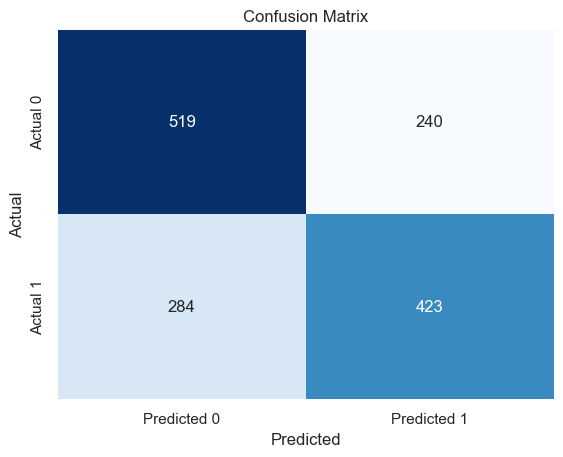

In [131]:
# Visualize the confusion matrix
visualize_confusion_matrix(cm)

# Conclusion

In the evaluation of various machine learning models for lead categorization within FicZon Inc, XGBoost emerges as the top-performing model, showcasing promising results across multiple metrics.

**XGBoost Performance:**
  - **Accuracy:** The model achieves an accuracy of 68%, indicating a reasonable overall correctness in predictions.
  - **Precision:** With a precision of 65%, XGBoost ensures that its predictions of high-potential leads are accurate about two-thirds of the time.
  - **Recall:** A recall of 70% highlights XGBoost's capability to effectively capture a substantial portion of actual high-potential leads.
  - **Specificity:** The model demonstrates 66% accuracy in identifying low-potential leads, showcasing a balanced approach between precision and recall.
  - **F1-Score:** The F1-Score of 0.67 signifies a harmonized measure of precision and recall, providing a comprehensive evaluation of the model's performance.


**Business Impact:**
  - The success of XGBoost in lead categorization could significantly boost FicZon Inc's sales effectiveness by providing a reliable automated mechanism for pre-categorizing leads.

In summary, the exploration of machine learning for lead categorization has shown promising results, with XGBoost leading the pack. Further optimization and a nuanced understanding of business priorities will contribute to the successful integration of machine learning to enhance FicZon Inc's sales force effectiveness.